by Assoc.Prof.Kobkiat Saraubon, Ph.D. | Computer Sci, KMUTNB

new version

update from  model.fit(X, y) # chang to the below
model.fit(X.to_numpy(), y)

(cannot fit using  DF, convert into numpy array before training)

# Classification 2 (2 Features - Fruit 2 classes)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns             # scatter plot **
import numpy as np

## Dataset

In [ ]:
# grap, lemon

In [ ]:
# X = [[27],
#      [35],
#      [39],
#      [21],
#      [22],
#      [45]]

# y_names = ['lemon', 'orange', 'orange', 'lemon', 'lemon', 'orange']
# y = [0, 1, 1, 0, 0, 1]

df = pd.read_csv('data/fruit2class.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/fruit2class.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/datasets'

advertising.csv  fruit2class.csv	    sale_quarterly1.xlsx	   treatment-nl.csv
digit0.png	 fruit3class.csv	    score_age.csv
digit2.png	 opsd_germany_daily.csv     score_age.gsheet
DL		 opsd_germany_daily.gsheet  timeseries02-plot-range01.png


In [ ]:
uri = '/content/drive/MyDrive/Colab Notebooks/datasets/fruit2class.csv'

df = pd.read_csv(uri)

In [ ]:
df.head()
# df

,m,d,target
0,6.0,4.2,0
1,5.7,3.6,0
2,6.5,5.5,0
3,6.6,3.2,0
4,7.1,5.9,0


## Data Visualization

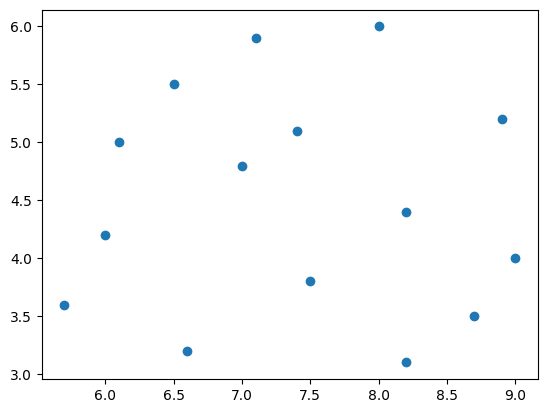

In [ ]:
plt.scatter(df.m, df.d)     # X=df.m   y=df.d
plt.show()

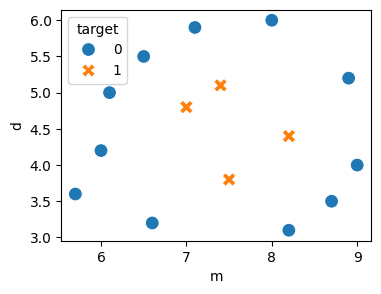

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='m', y='d', hue='target',
                style='target',
                s=100)
plt.show()

# Model

In [ ]:
# df.head()

In [ ]:
X = df.drop(['target'], axis=1)
X
X.head()

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,7.1,5.9


In [ ]:
y = df.target
y
# y.head()

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
# model.fit(X, y) # chang to the below
model.fit(X.to_numpy(), y)    ## MUST convert to this for new version 2023 2024 ( change to numpy before training)

DecisionTreeClassifier()

In [ ]:
X

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,7.1,5.9
5,8.2,3.1
6,8.2,4.4
7,7.0,4.8
8,7.5,3.8
9,7.4,5.1


In [ ]:
X.to_numpy()

array([[6. , 4.2],
       [5.7, 3.6],
       [6.5, 5.5],
       [6.6, 3.2],
       [7.1, 5.9],
       [8.2, 3.1],
       [8.2, 4.4],
       [7. , 4.8],
       [7.5, 3.8],
       [7.4, 5.1],
       [8.9, 5.2],
       [8. , 6. ],
       [9. , 4. ],
       [6.1, 5. ],
       [8.7, 3.5]])

In [ ]:
np.array(X)

array([[6. , 4.2],
       [5.7, 3.6],
       [6.5, 5.5],
       [6.6, 3.2],
       [7.1, 5.9],
       [8.2, 3.1],
       [8.2, 4.4],
       [7. , 4.8],
       [7.5, 3.8],
       [7.4, 5.1],
       [8.9, 5.2],
       [8. , 6. ],
       [9. , 4. ],
       [6.1, 5. ],
       [8.7, 3.5]])

In [ ]:
# model.fit(X, y) # OLD
# Error UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
 # warnings.warn(array([0, 1])

DecisionTreeClassifier()

## Predict

In [ ]:
# X_input = [[25.3]]

X_input = [[5.6, 3.5]]      # 2 Features (m, d)

y_predict = model.predict(X_input)
y_predict
print('Result =', y_predict[0])

Result = 0


In [ ]:
fruit_classes = ['Grape','Lemon']

In [ ]:
prd = fruit_classes[y_predict[0]]
print('Result: {}'. format(prd))

Result: Grape


In [ ]:
# X        #
# X.to_numpy()

In [ ]:
X_input = [[5.6, 4.2],          # fruit 1
           [7.6, 4.5]]          # fruit 2
y_predict = model.predict(X_input)
y_predict

array([0, 1])

In [ ]:
print('Result:')
for i in y_predict:
    print(fruit_classes[i])

Result:
Grape
Lemon


In [ ]:
for i, val in enumerate(y_predict):
    print(f'{X_input[i]} = {val}  {fruit_classes[val]}')

[5.6, 4.2] = 0  Grape
[7.6, 4.5] = 1  Lemon


## Visualize Model
- Tree
- Decision regions

### Tree
- scikit learn v >= .21
- python-graphviz + pydotplus (Optional)

In [ ]:
# !pip show scikit-learn
# !conda list scikit-learn

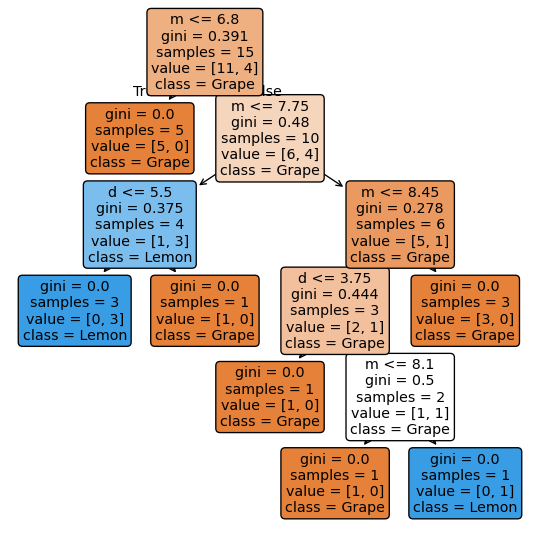

In [ ]:
from sklearn.tree import plot_tree

# data_feature_names = ['size']
data_feature_names = ['m', 'd' ]

plt.subplots(nrows=1, ncols=1, figsize=(7, 7), dpi=96)
# plt.figure(figsize=(6,6))

plot_tree(model,
         filled=True, rounded=True,
         feature_names=data_feature_names,
         class_names=fruit_classes)

plt.show()

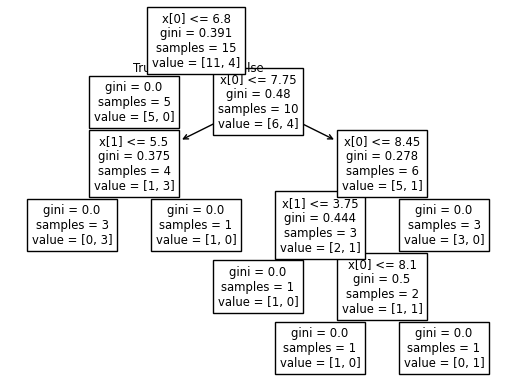

In [ ]:
plot_tree(model)
plt.show()

### Decision regions

In [ ]:
# !pip show mlxtend
# !pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
# plot needs Numpy
X = np.array(X)
y = np.array(y)

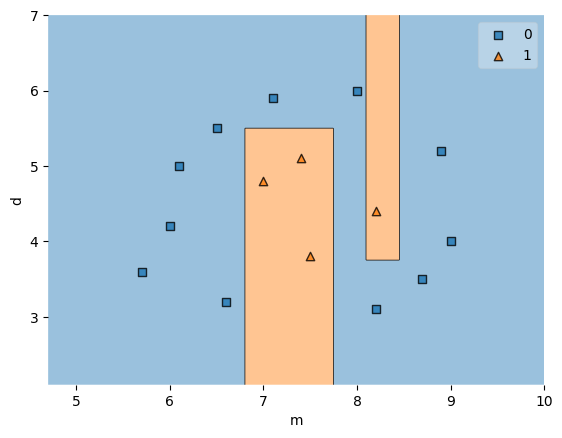

In [ ]:
# Plot
plot_decision_regions(X, y, clf=model)

plt.xlabel('m')
plt.ylabel('d')
plt.show()

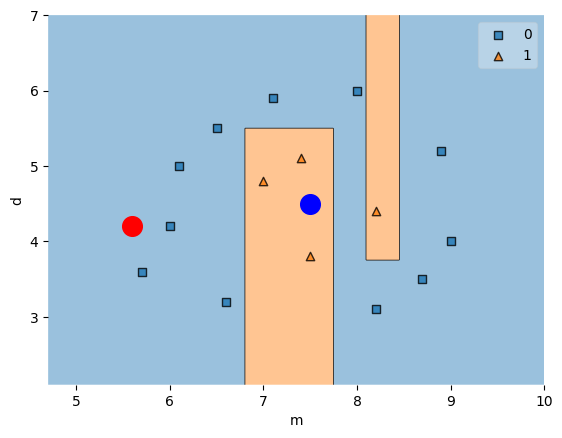

In [ ]:
# Plot
plot_decision_regions(X, y, clf=model)

X_input = [[5.6, 4.2],
           [7.5, 4.5]]

plt.scatter(X_input[0][0], X_input[0][1], s=200, c='r')     # fruit 1 (input 1)
plt.scatter(X_input[1][0], X_input[1][1], s=200, c='b')     # fruit 2 (input 2)

plt.xlabel('m')
plt.ylabel('d')
plt.show()

In [ ]:
# X_input_size = 25

X_input_size = [5.6, 3.5]

if (X_input_size[0] <= 6.8):     # m
    fruit = 'Lemon'
elif (X_input_size[1] <= 5.55):  # d
    if (X_input_size[0] <= 7.75):
        ....


# Classification 2: (Fruit 3 classes)
Grape, Lemon, Orange

## Dataset

In [ ]:
# X = [[27],
#      [35],
#      [39],
#      [21],
#      [22],
#      [45],
#      [102],
#      [110],
#      [120] ]

# y_names = ['lemon', 'orange', 'orange', 'lemon', 'lemon', 'orange', 'pamelo', 'pamelo', 'pamelo']
# y = [0, 1, 1, 0, 0, 1, 2, 2, 2]

In [ ]:
# df = pd.read_csv('data/fruit3class.csv')

uri = '/content/drive/MyDrive/Colab Notebooks/datasets/fruit3class.csv'

df = pd.read_csv(uri)
df

,m,d,target
0,6.0,4.2,0
1,5.7,3.6,0
2,6.5,5.5,0
3,6.6,3.2,0
4,6.9,5.9,0
5,8.0,3.1,0
6,8.2,4.4,1
7,7.0,4.8,1
8,7.5,3.8,1
9,7.4,5.1,1


## Data Visualization

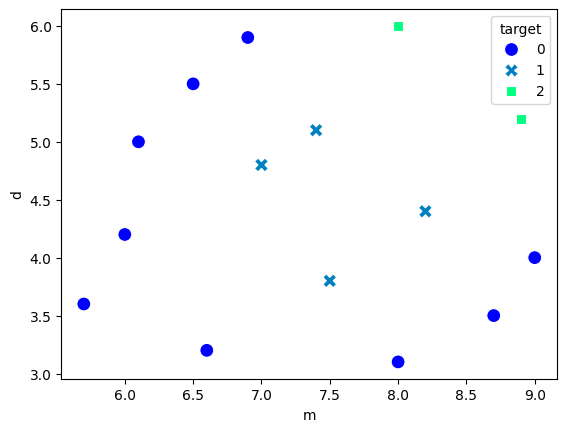

In [ ]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
sns.scatterplot(data=df, x='m', y='d', hue='target', style='target', s=100,
            palette='winter'
               )
plt.show()

## Model

In [ ]:
X = df.drop(['target'], axis=1)
# X
X.head()

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,6.9,5.9


In [ ]:
y = df.target
y

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [ ]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [ ]:
fruit_classes = ['Grape','Lemon','Orange']

## Predict

In [ ]:
X_input = [[5.6, 4.2],          # fruit 1
           [7.6, 4.5],          # fruit 2
           [7.8, 5.4]]          # fruit 3
y_predict = model.predict(X_input)
y_predict

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 2])

In [ ]:
for i, k in enumerate(y_predict):
    print(f'{X_input[i]} = {fruit_classes[k]}')

[5.6, 4.2] = Grape
[7.6, 4.5] = Lemon
[7.8, 5.4] = Orange


## Visualize Model

### Tree

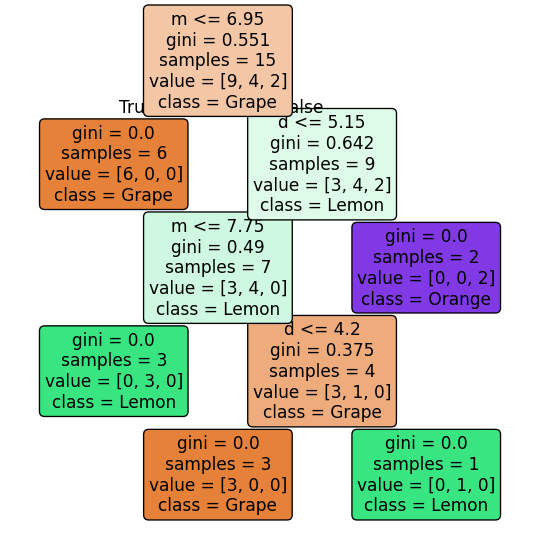

In [ ]:
# from sklearn.tree import plot_tree

data_feature_names = ['m', 'd' ]

plt.subplots(nrows=1, ncols=1, figsize=(7, 7), dpi=96)
# plt.figure(figsize=(6,6))

plot_tree(model,
         filled=True, rounded=True,
         feature_names=data_feature_names,
         class_names=fruit_classes)

plt.show()

### Decision regions

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


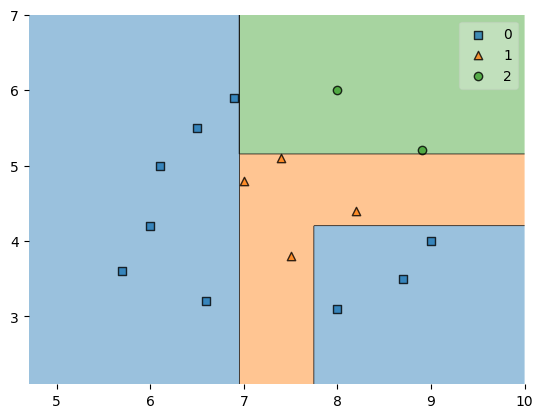

In [103]:
# plot needs Numpy
X = np.array(X)
y = np.array(y)

plot_decision_regions(X, y, clf=model)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


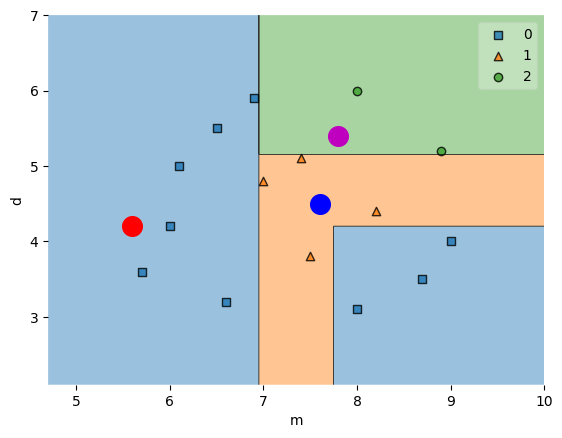

In [ ]:
# Plot
plot_decision_regions(X, y, clf=model)

X_input = [[5.6, 4.2],          # fruit 1
           [7.6, 4.5],          # fruit 2
           [7.8, 5.4]]          # fruit 3

plt.scatter(X_input[0][0], X_input[0][1], s=200, c='r')     # fruit 1 (input 1)
plt.scatter(X_input[1][0], X_input[1][1], s=200, c='b')     # fruit 2 (input 2)
plt.scatter(X_input[2][0], X_input[2][1], s=200, c='m')     # fruit 2 (input 2)

plt.xlabel('m')
plt.ylabel('d')
plt.show()

In [ ]:
y_predict = model.predict(X_input)
for i, k in enumerate(y_predict):
    print(f'{X_input[i]} = {fruit_classes[k]}')

[5.6, 4.2] = Grape
[7.6, 4.5] = Lemon
[7.8, 5.4] = Orange


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


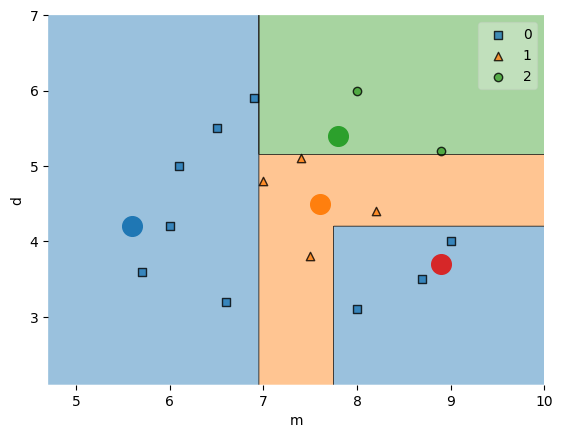

In [ ]:
X_input = [[5.6, 4.2],          # fruit 1
           [7.6, 4.5],          # fruit 2
           [7.8, 5.4],          # fruit 3
           [8.9, 3.7]]          # fruit 4

plot_decision_regions(X, y, clf=model)

for i, x in enumerate(X_input):
    # print(x)
    plt.scatter(x[0], x[1], s=200)


plt.xlabel('m')
plt.ylabel('d')
plt.show()

In [ ]:
y_predict = model.predict(X_input)
for i, k in enumerate(y_predict):
    print(f'{X_input[i]} = {y_predict[i]} {fruit_classes[k]}')

[5.6, 4.2] = 0 Grape
[7.6, 4.5] = 1 Lemon
[7.8, 5.4] = 2 Orange
[8.9, 3.7] = 0 Grape


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


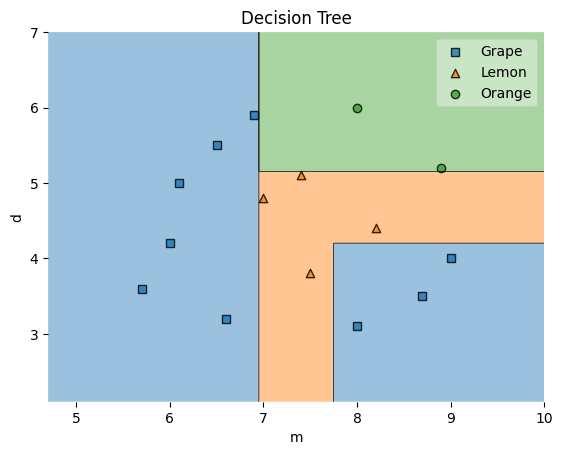

In [ ]:
# Plotting decision regions with Legend

fruit_classes = ['Grape','Lemon','Orange']      # Legend

ax = plot_decision_regions(X, y, clf=model)

plt.xlabel('m')
plt.ylabel('d')
plt.title('Decision Tree')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          fruit_classes,
          framealpha=0.4)

plt.show()